###### The purpose of this script is to find out which healthcare companies had the highest returns in the pre and post covid periods.

In [13]:
#dependancies
import pandas as pd
from pathlib import Path
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import requests
import json
import pprint
import warnings
warnings.filterwarnings("ignore")

In [14]:
#using yfinance package to pull company name
import yfinance as yf

In [15]:
#reading healthcare csv
healthcare_path = Path("../Resources/healthcare_returns_complete.csv")
healthcare_df = pd.read_csv(healthcare_path, encoding="utf-8")
healthcare_df.head()

,Unnamed: 0,Symbol,GICS sector,Market Cap Type,Market Cap,Average Volume,Return from 2017-2019 (Pre-Covid),Return from 2020-2022 (Post-Covid)
0,0,NVO,Health Care,Large cap,260652723120,1565762,59.343087,132.104259
1,1,REGN,Health Care,Large cap,86238124754,637527,0.771226,90.870368
2,2,VRTX,Health Care,Large cap,78348616645,1110826,194.195889,31.120592
3,3,SGEN,Health Care,Large cap,37002973603,1468401,114.216058,13.035440
4,4,BNTX,Health Care,Large cap,31469610717,637153,111.575757,320.195808


In [25]:
#creating new datatframe to store precovid top performers
top_healthcare_precovid = healthcare_df.sort_values("Return from 2017-2019 (Pre-Covid)", ascending = False)
del top_healthcare_precovid['Return from 2020-2022 (Post-Covid)']
del top_healthcare_precovid['Unnamed: 0']
top_healthcare_precovid['Company Name']=""
top_healthcare_precovid = top_healthcare_precovid.head(10)

for index, row in top_healthcare_precovid.iterrows():
    ticker=row['Symbol']
    ticker_info = yf.Ticker(ticker)
    company_name = ticker_info.info['longName']
    top_healthcare_precovid.loc[index, 'Company Name'] = company_name



In [26]:
#formatting top performer dataframe
top_healthcare_precovid=top_healthcare_precovid[['Company Name', 'Symbol', 'GICS sector', 'Return from 2017-2019 (Pre-Covid)', 'Market Cap Type', 'Market Cap', 'Average Volume']]
top_healthcare_precovid=top_healthcare_precovid.head(5)
top_healthcare_precovid

,Company Name,Symbol,GICS sector,Return from 2017-2019 (Pre-Covid),Market Cap Type,Market Cap,Average Volume
40,"Arrowhead Pharmaceuticals, Inc.",ARWR,Health Care,4015.384571,Mid cap,2564784660,1425556
723,"Semler Scientific, Inc.",SMLR,Health Care,3211.034258,Micro cap,175992505,37265
46,"Mirati Therapeutics, Inc.",MRTX,Health Care,2548.041138,Mid cap,2250126669,985251
708,"Zynex, Inc.",ZYXI,Health Care,2174.284554,Small cap,443137573,382678
36,"Axsome Therapeutics, Inc.",AXSM,Health Care,1383.285740,Mid cap,2698458227,1033635


In [18]:
#creating new datatframe to store postcovid top performers

top_healthcare_postcovid = healthcare_df.sort_values("Return from 2020-2022 (Post-Covid)", ascending = False)
del top_healthcare_postcovid['Return from 2017-2019 (Pre-Covid)']
del top_healthcare_postcovid['Unnamed: 0']
top_healthcare_postcovid['Company Name']=""
top_healthcare_postcovid = top_healthcare_postcovid.head(10)

for index, row in top_healthcare_postcovid.iterrows():
    ticker=row['Symbol']
    ticker_info = yf.Ticker(ticker)
    company_name = ticker_info.info['longName']
    top_healthcare_postcovid.loc[index, 'Company Name'] = company_name

#formatting top performer dataframe

top_healthcare_postcovid=top_healthcare_postcovid[['Company Name', 'Symbol', 'GICS sector', 'Return from 2020-2022 (Post-Covid)', 'Market Cap Type', 'Market Cap', 'Average Volume']]

top_healthcare_postcovid=top_healthcare_postcovid.head(5)

top_healthcare_postcovid

,Company Name,Symbol,GICS sector,Return from 2020-2022 (Post-Covid),Market Cap Type,Market Cap,Average Volume
57,"Celldex Therapeutics, Inc.",CLDX,Health Care,1889.732121,Small cap,1656972334,591048
538,"Moderna, Inc.",MRNA,Health Care,817.833408,Large cap,57628000036,3453513
188,"Altimmune, Inc.",ALT,Health Care,770.370417,Micro cap,206478428,1312393
114,"Aclaris Therapeutics, Inc.",ACRS,Health Care,720.312518,Small cap,543547657,926279
802,Zentek Ltd.,ZTEK,Health Care,453.571409,Micro cap,150296313,35060


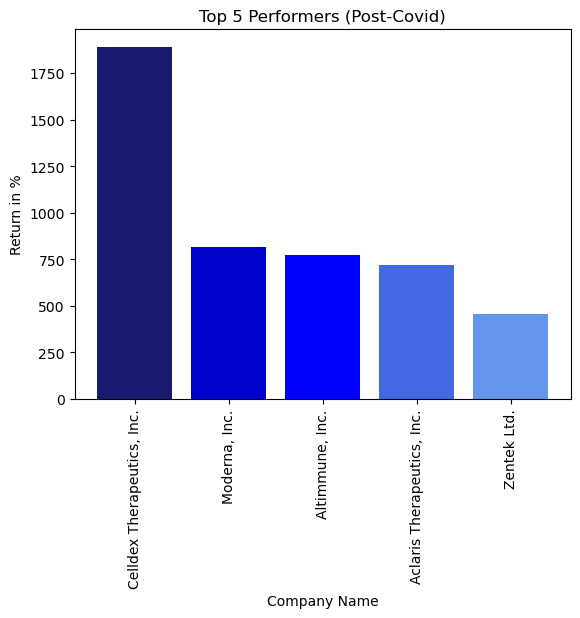

In [19]:
#setting colors for post-covid chart
colors = ['midnightblue','mediumblue','blue', 'royalblue','cornflowerblue']
#setting tick locations for post covid chart
tick_locations = [value for value in top_healthcare_postcovid['Company Name']]
#plotting barchart for post covid top performers
plt.bar(top_healthcare_postcovid['Company Name'], top_healthcare_postcovid['Return from 2020-2022 (Post-Covid)'],color
        =colors, alpha=1, align="center")
plt.xticks(tick_locations, top_healthcare_postcovid["Company Name"], rotation="vertical")
plt.title('Top 5 Performers (Post-Covid)')
plt.xlabel('Company Name')
plt.ylabel('Return in %')

plt.savefig('top_performers_post_covid.png')
plt.show()

In [20]:
#formatting top performer dataframe

top_healthcare_postcovid['Market Cap']=top_healthcare_postcovid['Market Cap'].astype(int).map("${:,}".format)


In [21]:

top_healthcare_postcovid['Average Volume']=top_healthcare_postcovid['Average Volume'].astype(int).map("{:,}".format)
top_healthcare_postcovid['Return from 2020-2022 (Post-Covid)']=top_healthcare_postcovid['Return from 2020-2022 (Post-Covid)'].astype(float).map("{:,.2f}%".format)

top_healthcare_postcovid

,Company Name,Symbol,GICS sector,Return from 2020-2022 (Post-Covid),Market Cap Type,Market Cap,Average Volume
57,"Celldex Therapeutics, Inc.",CLDX,Health Care,"1,889.73%",Small cap,"$1,656,972,334","591,048"
538,"Moderna, Inc.",MRNA,Health Care,817.83%,Large cap,"$1,793,425,188","3,453,513"
188,"Altimmune, Inc.",ALT,Health Care,770.37%,Micro cap,"$206,478,428","1,312,393"
114,"Aclaris Therapeutics, Inc.",ACRS,Health Care,720.31%,Small cap,"$543,547,657","926,279"
802,Zentek Ltd.,ZTEK,Health Care,453.57%,Micro cap,"$150,296,313","35,060"


In [22]:
#setting colors and tick locations for precovid top performers
colors = ['saddlebrown','chocolate','darkorange', 'orange','bisque']
tick_locations = [value for value in top_healthcare_precovid['Company Name']]


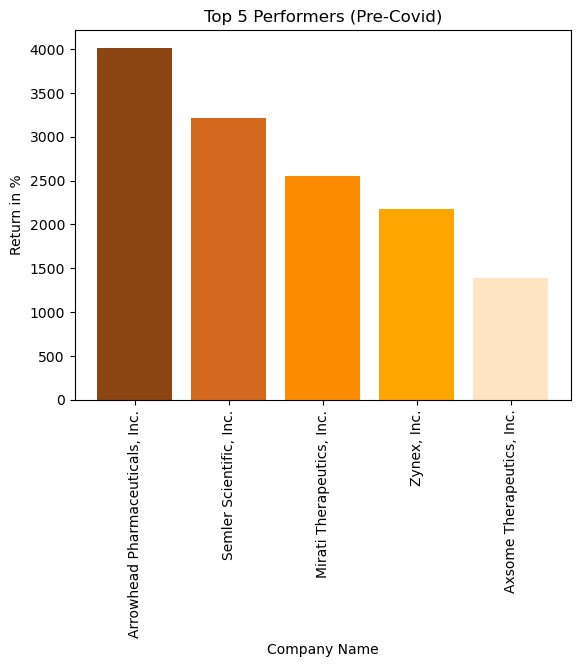

In [23]:
#plotting barchart of precovid top performers
plt.bar(top_healthcare_precovid['Company Name'], top_healthcare_precovid['Return from 2017-2019 (Pre-Covid)'],color
        =colors, alpha=1, align="center")
plt.xticks(tick_locations, top_healthcare_precovid["Company Name"], rotation="vertical")
plt.title('Top 5 Performers (Pre-Covid)')
plt.xlabel('Company Name')
plt.ylabel('Return in %')

plt.savefig('top_performers_pre_covid.png')

plt.show()


In [27]:
#formatting top performers dataframe
top_healthcare_precovid['Market Cap']=top_healthcare_precovid['Market Cap'].astype(float).map("${:,}".format)
top_healthcare_precovid['Average Volume']=top_healthcare_precovid['Average Volume'].astype(int).map("{:,}".format)
top_healthcare_precovid['Return from 2017-2019 (Pre-Covid)']=top_healthcare_precovid['Return from 2017-2019 (Pre-Covid)'].astype(float).map("{:,.2f}%".format)
top_healthcare_precovid

,Company Name,Symbol,GICS sector,Return from 2017-2019 (Pre-Covid),Market Cap Type,Market Cap,Average Volume
40,"Arrowhead Pharmaceuticals, Inc.",ARWR,Health Care,"4,015.38%",Mid cap,"$2,564,784,660.0","1,425,556"
723,"Semler Scientific, Inc.",SMLR,Health Care,"3,211.03%",Micro cap,"$175,992,505.0","37,265"
46,"Mirati Therapeutics, Inc.",MRTX,Health Care,"2,548.04%",Mid cap,"$2,250,126,669.0","985,251"
708,"Zynex, Inc.",ZYXI,Health Care,"2,174.28%",Small cap,"$443,137,573.0","382,678"
36,"Axsome Therapeutics, Inc.",AXSM,Health Care,"1,383.29%",Mid cap,"$2,698,458,227.0","1,033,635"
